# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [132]:
# Dependencies
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key
# import citipy
from citipy import citipy

# from api_keys import api_key

# output file (CSV)
# output_file = "output_data/cities.csv"

# range of latitues and Longitudes for random
lat_range = (-90, 90)
long_range = (-180, 180)
# create random latitudes and Longitude: change size to only 25 for testing
random_lats = np.random.uniform(lat_range[0], lat_range[1], size=40)
random_longs = np.random.uniform(long_range[0], long_range[1], size=40)
# zip the list together
zipped_lat_longs = zip(random_lats, random_longs)
lats_longs_list = list(zipped_lat_longs)


In [133]:
# for testing generate one city name
lat_long = lats_longs_list[0]

citipy.nearest_city(lat_long[0], lat_long[1]).city_name


'ushuaia'

## Generate Cities List

In [134]:
# # # generate emply list for cities
# cities = []
# # find nearest city from each lat and long
# for lat_long in lats_longs_list:
#     city_name = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
# # if city is unique then added it to the cities list
#     if city_name not in cities:
#         cities.append(city_name)
# # count number of citiies
# len(cities)

    


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [135]:
print('Start of Records')
print('------------------------')

# # generate emply list for cities
cities = []
# find nearest city from each lat and long
for lat_long in lats_longs_list:
    city_name = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
# if city is unique then added it to the cities list
    if city_name not in cities:
        cities.append(city_name)
# count number of citiies
# len(cities)


# create the url to call for API
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# create list to hold all the required items:
city_name_list = []
country_list = []
lat_list = []
long_list = []
temp = []
max_temp = []
humid = []
clouds = []
wind = []

# initiate counter for city number
number = 1
# loop thru the list of cities and permorm for data on each.
for city_name in cities:
    try:
        response = requests.get(city_url + city_name).json()
        city_name_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        long_list.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing Record {number} of set {len(cities)} | {city_name}")
        number = number + 1
    
#     except KeyError:
    except:
        print(f"City not found")
    continue
#         print(f"City not found {number} of {len(cities)}. | Skipping {city_name}")
#         number = number + 1

print('End of Records')
print('------------------------')


Start of Records
------------------------
Processing Record 1 of set 39 | ushuaia
Processing Record 2 of set 39 | bathsheba
Processing Record 3 of set 39 | komsomolskiy
Processing Record 4 of set 39 | colac
Processing Record 5 of set 39 | broome
Processing Record 6 of set 39 | busselton
Processing Record 7 of set 39 | new norfolk
Processing Record 8 of set 39 | nemuro
Processing Record 9 of set 39 | bredasdorp
Processing Record 10 of set 39 | paamiut
Processing Record 11 of set 39 | makakilo city
Processing Record 12 of set 39 | east london
Processing Record 13 of set 39 | jamestown
Processing Record 14 of set 39 | esperance
Processing Record 15 of set 39 | prado
Processing Record 16 of set 39 | lompoc
Processing Record 17 of set 39 | fairbanks
Processing Record 18 of set 39 | thompson
Processing Record 19 of set 39 | norman wells
Processing Record 20 of set 39 | vaini
City not found
Processing Record 21 of set 39 | khatanga
Processing Record 22 of set 39 | hobart
Processing Record 23 

In [136]:
print(city_url)

https://api.openweathermap.org/data/2.5/weather?appid=87ac0f45fbc8d9105aaa68d3781039eb&units=imperial&q=


In [137]:
# create DataFrame with the items:
city_data_df = pd.DataFrame({'City': city_name_list,
                             'Latitude': lat_list,
                             'Longtude': long_list,
                             'Temperature': temp,
                             'Max Temperature': max_temp,
                             'Humidity': humid,
                             'Clouds': clouds,
                             'Wind Speed': wind
    
})
city_data_df


,City,Latitude,Longtude,Temperature,Max Temperature,Humidity,Clouds,Wind Speed
0,Ushuaia,-54.8000,-68.3000,35.26,35.26,69,75,13.80
1,Bathsheba,13.2167,-59.5167,84.81,84.81,74,40,19.57
2,Yangi Marg`ilon,40.4272,71.7189,72.32,72.32,60,75,13.80
3,Colac,-38.3333,143.5833,43.43,46.62,92,28,4.12
4,Broome,42.2506,-75.8330,82.54,85.19,66,40,1.99
5,Busselton,-33.6500,115.3333,53.04,53.10,93,100,12.33
6,New Norfolk,-42.7826,147.0587,41.43,45.88,78,68,1.01
7,Nemuro,43.3236,145.5750,59.88,59.88,96,98,8.84
8,Bredasdorp,-34.5322,20.0403,45.72,45.72,81,31,10.36
9,Paamiut,61.9940,-49.6678,42.10,42.10,97,100,4.07


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [138]:
# save the DataFrame as csv
city_data_df.to_csv("weather_data.csv", index = False)

In [139]:
# check the DataFrame for cities that have Humidity above 100
humidity_100 = city_data_df[city_data_df["Humidity"]>100]
humidity_100

,City,Latitude,Longtude,Temperature,Max Temperature,Humidity,Clouds,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [140]:
#  Get the indices of cities that have humidity over 100%.


In [141]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

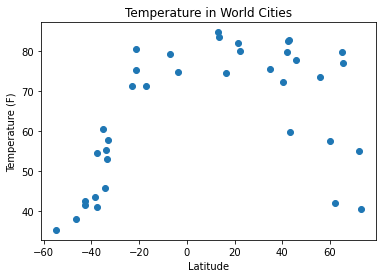

In [142]:
# plot Latitude vs. Temp plot - of course we will use scatter plot
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'], marker="o")

plt.title("Temperature in World Cities")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')

plt.show()

## Latitude vs. Humidity Plot

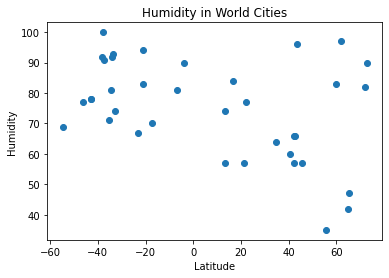

In [143]:
# plot Latitude vs. Humidity plot - of course we will use scatter plot
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o")

plt.title("Humidity in World Cities")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

plt.show()

## Latitude vs. Cloudiness Plot

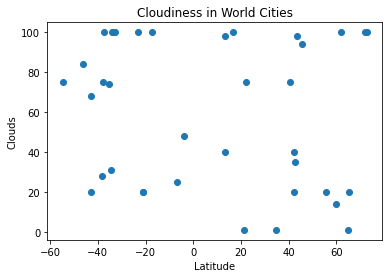

In [144]:
# plot Latitude vs. Cloudiness plot - of course we will use scatter plot
plt.scatter(city_data_df['Latitude'], city_data_df['Clouds'], marker="o")

plt.title("Cloudiness in World Cities")
plt.ylabel('Clouds')
plt.xlabel('Latitude')

plt.show()

## Latitude vs. Wind Speed Plot

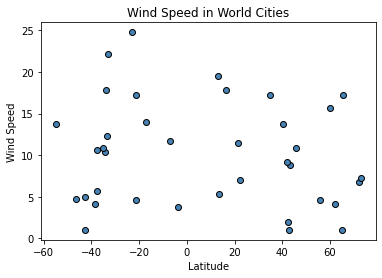

In [153]:
# plot Latitude vs. Cloudiness plot - of course we will use scatter plot
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], facecolor = "steelblue", edgecolor = "black")

plt.title("Wind Speed in World Cities")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

plt.show()

## Linear Regression

In [146]:
# create Northern and Southern Hemisphere DF
northern_hem = city_data_df.loc[city_data_df["Latitude"] >= 0]
sothern_hem = city_data_df.loc[city_data_df["Longtude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
# Add the Linear regression
x_values = city_data_df["Latitude"]
y_values = city_data_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()


NameError: name 'city_data_df' is not defined

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression